In [13]:
#  import all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# read dataset
df = pd.read_csv('/Users/zeinab/Downloads/IMT/Datasets/4- International_Airlines/city_pairs.csv')
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [41]:
all_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               89320 non-null

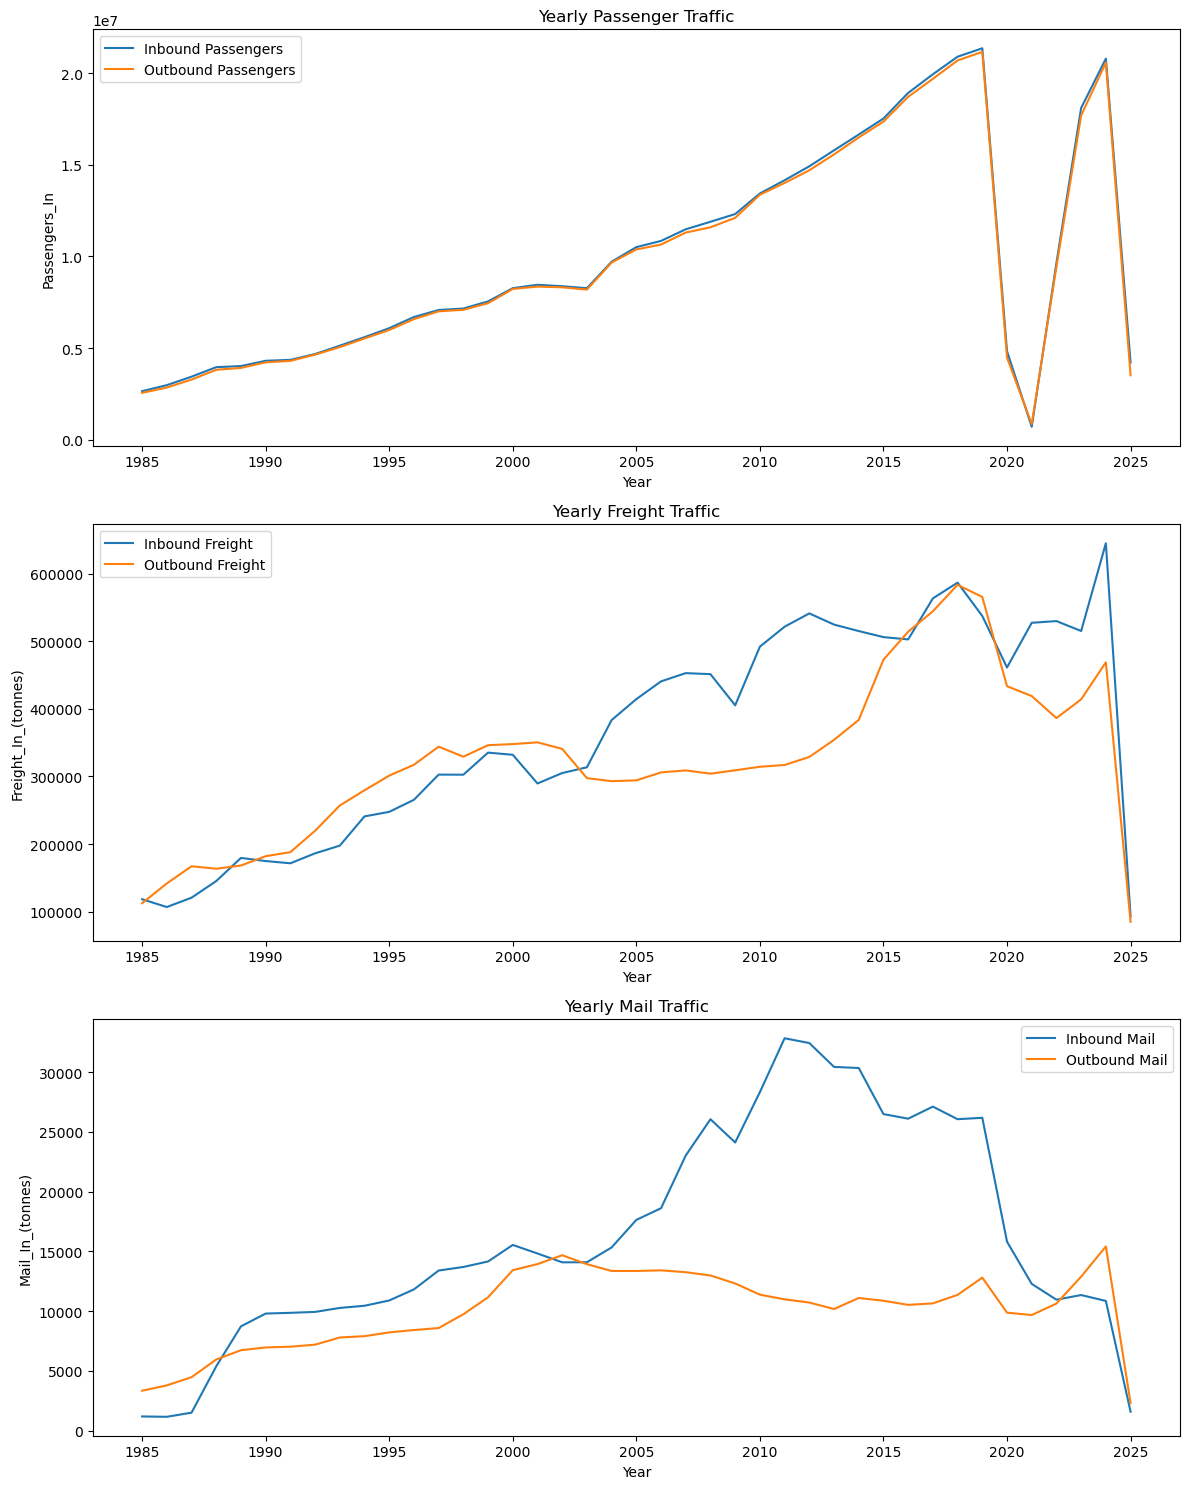

In [ ]:
df = all_traffic.copy()

df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_num'].astype(str).str.zfill(2))

yearly_summary = df.groupby('Year').agg({
    'Passengers_In': 'sum',
    'Passengers_Out': 'sum',
    'Freight_In_(tonnes)': 'sum',
    'Freight_Out_(tonnes)': 'sum',
    'Mail_In_(tonnes)': 'sum',
    'Mail_Out_(tonnes)': 'sum'
}).reset_index()

fig, axs = plt.subplots(3, 1, figsize=(12, 15))

sns.lineplot(data=yearly_summary, x='Year', y='Passengers_In', label='Inbound Passengers', ax=axs[0])
sns.lineplot(data=yearly_summary, x='Year', y='Passengers_Out', label='Outbound Passengers', ax=axs[0])
axs[0].set_title('Yearly Passenger Traffic')

sns.lineplot(data=yearly_summary, x='Year', y='Freight_In_(tonnes)', label='Inbound Freight', ax=axs[1])
sns.lineplot(data=yearly_summary, x='Year', y='Freight_Out_(tonnes)', label='Outbound Freight', ax=axs[1])
axs[1].set_title('Yearly Freight Traffic')

sns.lineplot(data=yearly_summary, x='Year', y='Mail_In_(tonnes)', label='Inbound Mail', ax=axs[2])
sns.lineplot(data=yearly_summary, x='Year', y='Mail_Out_(tonnes)', label='Outbound Mail', ax=axs[2])
axs[2].set_title('Yearly Mail Traffic')

plt.tight_layout()
plt.show()

In [45]:
df.tail()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,Date
89315,Feb-25,Sydney,Wuhan,China,2255,23.744,1.544,512,46.932,0.038,2767,70.676,1.582,2025,2,2025-02-01
89316,Feb-25,Sydney,Xiamen,China,7474,299.490,0.610,4456,194.780,0.000,11930,494.270,0.610,2025,2,2025-02-01
89317,Feb-25,Sydney,Xi'an,China,1136,30.711,0.000,295,49.284,0.003,1431,79.995,0.003,2025,2,2025-02-01
89318,Feb-25,Sydney,Zhengzhou,China,1620,49.738,13.430,690,2.520,0.000,2310,52.258,13.430,2025,2,2025-02-01
89319,Feb-25,Toowoomba Wellcamp,Hong Kong,Hong Kong (SAR),0,31.816,0.000,0,93.068,0.000,0,124.884,0.000,2025,2,2025-02-01


In [9]:
# ! pip install pandas-profiling
# ! pip install ydata-profiling
! pip install ydata-profiling

In [10]:
from pandas_profiling import ProfileReport

/var/folders/7y/37m2bn3d6y778v332m4hd77c0000gn/T/ipykernel_25492/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [15]:
profile = ProfileReport(df)

In [16]:
profile.to_file('Australianplanes.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 45.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]